# Exploratory Data Analysis Airline Delay and Cancellation Data 2018

#### Agenda
- Loading the dataset
- Data wrangling for missing variables. 
- Data transformation. 
- Data visualization
- Answering the main questions: What are some trends found in 2018 flight data in terms of delays by month and by airlines?

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('2018.csv')
df.head(15)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-01-01,UA,2422,ORD,OMA,2241,2244.0,3.0,15.0,2259.0,...,93.0,79.0,62.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-01-01,UA,2421,IAH,LAS,750,747.0,-3.0,14.0,801.0,...,206.0,193.0,173.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,UA,2420,DEN,CID,1324,1318.0,-6.0,11.0,1329.0,...,115.0,102.0,85.0,692.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-01-01,UA,2419,SMF,EWR,2224,2237.0,13.0,10.0,2247.0,...,314.0,299.0,280.0,2500.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-01-01,UA,2418,RIC,DEN,1601,1559.0,-2.0,12.0,1611.0,...,252.0,237.0,217.0,1482.0,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.shape

(7213446, 28)

In [77]:
# Since the data set is too large, we are looking at the date when they depart from JFK, New York.
# Slice the dataset

In [78]:
jfk = df[df['ORIGIN'] =='JFK']

In [79]:
jfk.shape

(129684, 28)

In [80]:
jfk.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

In [81]:
# Replace the airline names

In [82]:
jfk['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

/Users/minjungsim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [83]:
jfk.tail()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
7212835,2018-12-31,American Airlines,255,JFK,LAX,1000,954.0,-6.0,33.0,1027.0,...,397.0,402.0,361.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
7212849,2018-12-31,American Airlines,277,JFK,ORD,1300,1255.0,-5.0,21.0,1316.0,...,172.0,185.0,146.0,740.0,NaN,NaN,NaN,NaN,NaN,NaN
7213016,2018-12-31,American Airlines,1414,JFK,ORD,1708,1803.0,55.0,28.0,1831.0,...,186.0,191.0,140.0,740.0,55.0,0.0,5.0,0.0,0.0,NaN
7213037,2018-12-31,American Airlines,1444,JFK,CLT,815,814.0,-1.0,20.0,834.0,...,139.0,132.0,105.0,541.0,NaN,NaN,NaN,NaN,NaN,NaN
7213038,2018-12-31,American Airlines,1445,JFK,SEA,1835,1836.0,1.0,25.0,1901.0,...,394.0,371.0,335.0,2422.0,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
jfk.shape

(129684, 28)

In [85]:
# Total number of canceled flights
jfk.CANCELLED.sum()

3436.0

##### -Among 129684 flights departing from JFK, 3436 flights experienced delays.
* 2.65% of cancellation
* We can assume one out of every 38 flights gets cancelled.

In [86]:
# Let's explore column CANCELLED
jfk.CANCELLED.unique()
# boolean: 0 = not cancelled, 1: cancelled

array([0., 1.])

### Note
* Canceled flights are not counted as Delayed flights.
* If it was cancelled,tge values are represented as NaN.
* We can find out Cancelled Flight.
* DEP_DELAY: Actual Departure Time
* ARR_DELAY: Total Delay on Arrival in minutes
* If the numbers are negative, there was no delay and arrive on-time/ early.

In [87]:
jfk.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

##### Drop/Rename columns

In [88]:
drop_col = jfk[['ORIGIN', 'WHEELS_ON', 'WHEELS_OFF', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'Unnamed: 27']]

###### CRS_DEP_TIME -> scheduled departure time (local, hhmm), op -> operating carrier, 
###### CRS_ELAPSED_TIME ->  (estimated elapse time), in minutes
###### CancellationCode -> reason for cancellation (A = carrier, B = weather, C = NAS, D =security)
###### TaxiOut -> The time elapsed between departure from the origin airport gate and wheels off, in minutes
###### AirTime -> Flight Time, in Minutes, in minutes
###### Distance -> Distance between airports (miles)
###### NAS_DELAY -> the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration.

In [89]:
data = jfk.drop(drop_col, axis = 1)

In [90]:
data.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'DEST', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [91]:
data.rename(columns = {'FL_DATE':'Date', 
                       'OP_CARRIER':'Airline', 
                       'OP_CARRIER_FL_NUM':'Flight_Number',
                       'DEST':'Destination',
                       'CRS_DEP_TIME':'Estimated_Dep_Time', 
                       'DEP_TIME':'Actual_Dep_Time', 
                       'DEP_DELAY':'Dep_Delay',
                       'TAXI_OUT':'Taxi_Out',
                       'TAXI_IN':'Taxi_In',
                       'CRS_ARR_TIME':'Estimated_Arr_Time',
                       'ARR_TIME':'Actual_Arr_Time',
                       'ARR_DELAY':'Arr_Delay',
                       'CANCELLED':'Cancelled',
                       'CANCELLATION_CODE':'Cancellation_Code',
                       'DIVERTED':'Diverted',
                       'AIR_TIME':'Air_Time',
                       'DISTANCE':'Distance',
                       'CARRIER_DELAY':'Carrier_Delay',
                       'WEATHER_DELAY':'Weather_Delay',
                       'NAS_DELAY':'NAS_Delay',
                       'SECURITY_DELAY':'Security_Delay',
                       'LATE_AIRCRAFT_DELAY':'Late_Aircraft_Delay'
                      }, inplace = True)

In [92]:
data[30:41]

,Date,Airline,Flight_Number,Destination,Estimated_Dep_Time,Actual_Dep_Time,Dep_Delay,Taxi_Out,Taxi_In,Estimated_Arr_Time,...,Cancelled,Cancellation_Code,Diverted,Air_Time,Distance,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
2283,2018-01-01,Endeavor Air,4112,PIT,2057,2049.0,-8.0,23.0,7.0,2259,...,0.0,NaN,0.0,68.0,340.0,NaN,NaN,NaN,NaN,NaN
2284,2018-01-01,Endeavor Air,4113,CMH,1500,1713.0,133.0,29.0,4.0,1715,...,0.0,NaN,0.0,80.0,483.0,61.0,0.0,0.0,0.0,50.0
2285,2018-01-01,Endeavor Air,4114,ORD,1129,1125.0,-4.0,28.0,11.0,1320,...,0.0,NaN,0.0,115.0,740.0,NaN,NaN,NaN,NaN,NaN
2291,2018-01-01,Endeavor Air,4153,IAD,1930,1927.0,-3.0,21.0,7.0,2105,...,0.0,NaN,0.0,52.0,228.0,NaN,NaN,NaN,NaN,NaN
2293,2018-01-01,Endeavor Air,4156,IAD,1350,1343.0,-7.0,27.0,7.0,1526,...,0.0,NaN,0.0,55.0,228.0,NaN,NaN,NaN,NaN,NaN
2294,2018-01-01,Endeavor Air,4158,BUF,2059,2209.0,70.0,26.0,8.0,2245,...,0.0,NaN,0.0,63.0,301.0,61.0,0.0,0.0,0.0,0.0
2295,2018-01-01,Endeavor Air,4163,ORF,1457,1447.0,-10.0,15.0,11.0,1643,...,0.0,NaN,0.0,59.0,290.0,NaN,NaN,NaN,NaN,NaN
2296,2018-01-01,Endeavor Air,4165,RIC,1455,1448.0,-7.0,17.0,6.0,1634,...,0.0,NaN,0.0,64.0,288.0,NaN,NaN,NaN,NaN,NaN
2297,2018-01-01,Endeavor Air,4170,DCA,2055,2111.0,16.0,28.0,2.0,2231,...,0.0,NaN,0.0,41.0,213.0,NaN,NaN,NaN,NaN,NaN
2300,2018-01-01,Endeavor Air,4189,CLT,1459,1456.0,-3.0,21.0,13.0,1725,...,0.0,NaN,0.0,97.0,541.0,NaN,NaN,NaN,NaN,NaN


In [93]:
data.isnull().sum()

Date                        0
Airline                     0
Flight_Number               0
Destination                 0
Estimated_Dep_Time          0
Actual_Dep_Time          3241
Dep_Delay                3766
Taxi_Out                 3428
Taxi_In                  3462
Estimated_Arr_Time          0
Actual_Arr_Time          3462
Arr_Delay                3982
Cancelled                   0
Cancellation_Code      126248
Diverted                    0
Air_Time                 3780
Distance                    0
Carrier_Delay          103644
Weather_Delay          103644
NAS_Delay              103644
Security_Delay         103644
Late_Aircraft_Delay    103644
dtype: int64

In [94]:
null_act_dep_time = pd.isnull(data[['Actual_Dep_Time']])
data[null_act_dep_time]

,Date,Airline,Flight_Number,Destination,Estimated_Dep_Time,Actual_Dep_Time,Dep_Delay,Taxi_Out,Taxi_In,Estimated_Arr_Time,...,Cancelled,Cancellation_Code,Diverted,Air_Time,Distance,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7212849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7213016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7213037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
data.dropna(subset=['Actual_Dep_Time', 'Actual_Arr_Time','Arr_Delay', 'Dep_Delay'], inplace=True)

In [96]:
data.isnull().sum()

Date                        0
Airline                     0
Flight_Number               0
Destination                 0
Estimated_Dep_Time          0
Actual_Dep_Time             0
Dep_Delay                   0
Taxi_Out                    0
Taxi_In                     0
Estimated_Arr_Time          0
Actual_Arr_Time             0
Arr_Delay                   0
Cancelled                   0
Cancellation_Code      125194
Diverted                    0
Air_Time                    0
Distance                    0
Carrier_Delay           99184
Weather_Delay           99184
NAS_Delay               99184
Security_Delay          99184
Late_Aircraft_Delay     99184
dtype: int64

#### Cancellation_Code = 'X' is not cancelled or NaN.

In [97]:
data["Cancellation_Code"].fillna("X", inplace = True)

##### Univariate Analysis

In [106]:
data.describe()

,Flight_Number,Estimated_Dep_Time,Actual_Dep_Time,Dep_Delay,Taxi_Out,Taxi_In,Estimated_Arr_Time,Actual_Arr_Time,Arr_Delay,Cancelled,Diverted,Air_Time,Distance,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Date_month
count,125194.000000,125194.000000,125194.000000,125194.000000,125194.000000,125194.000000,125194.000000,125194.000000,125194.000000,125194.0,125194.0,125194.000000,125194.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,125194.000000
mean,1917.310566,1385.534602,1380.671813,0.192992,27.458129,8.141492,1527.031295,1494.249772,0.045576,0.0,0.0,176.646325,1250.484504,23.380777,4.626874,21.201999,0.120492,21.342945,6.645846
std,1637.944806,488.397649,509.618624,0.829758,14.732096,7.042006,565.886487,584.134051,0.901613,0.0,0.0,115.953003,901.857669,58.834047,38.799480,41.827947,3.063682,46.678394,3.381236
min,1.000000,458.000000,1.000000,-0.483333,3.000000,1.000000,1.000000,1.000000,-1.566667,0.0,0.0,20.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,454.000000,920.000000,916.000000,-0.100000,18.000000,4.000000,1113.000000,1056.000000,-0.366667,0.0,0.0,73.000000,427.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1413.000000,1450.000000,1445.000000,-0.050000,24.000000,6.000000,1555.000000,1534.000000,-0.166667,0.0,0.0,143.000000,1028.000000,3.000000,0.000000,11.000000,0.000000,0.000000,7.000000
75%,2959.000000,1816.000000,1820.000000,0.116667,32.000000,9.000000,2015.000000,2003.000000,0.150000,0.0,0.0,307.000000,2248.000000,24.000000,0.000000,26.000000,0.000000,23.000000,10.000000
max,6135.000000,2359.000000,2400.000000,22.466667,178.000000,167.000000,2400.000000,2400.000000,21.933333,0.0,0.0,696.000000,4983.000000,1316.000000,1187.000000,926.000000,233.000000,1034.000000,12.000000


##### Data Visualization

* Plot the delays by month and by airlines
* Date: yyyy-mm-dd form, get month

In [99]:
# Minutes to hours 
data['Arr_Delay'] = data['Arr_Delay'] / 60

data['Dep_Delay'] = data['Dep_Delay'] / 60

In [100]:
pd.to_datetime(data.Date)

1586      2018-01-01
1825      2018-01-01
2213      2018-01-01
2214      2018-01-01
2216      2018-01-01
             ...    
7212835   2018-12-31
7212849   2018-12-31
7213016   2018-12-31
7213037   2018-12-31
7213038   2018-12-31
Name: Date, Length: 125194, dtype: datetime64[ns]

In [101]:
# pandas to_datetime
# Convert argument to datetime
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

data['Date_month'] = pd.to_datetime(data['Date']).dt.month

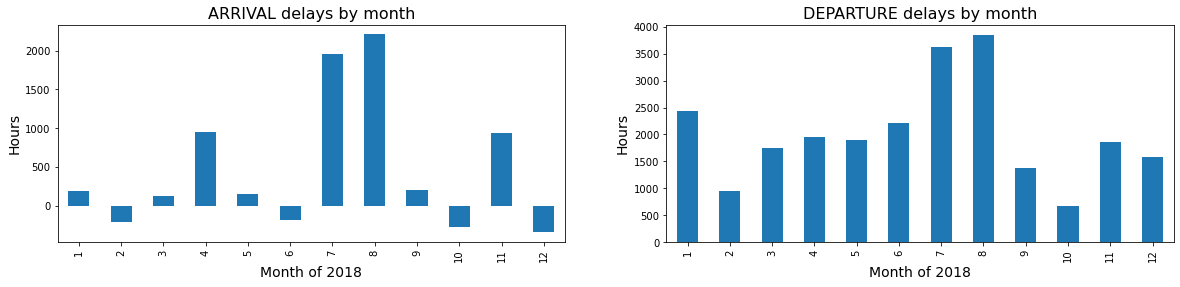

In [102]:
# ARRIVAL and DEPARTURE delays by month by month in 2018
# Estimated peak season: Summer -> July, August and September. Christmas and New year -> January and December
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(20, 10)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
data.groupby('Date_month').Arr_Delay.sum().plot.bar()
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of 2018', fontsize=14)

plt.subplot(2, 2 ,2)
data.groupby('Date_month').Dep_Delay.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of 2018', fontsize=14)

plt.show()

##### Which day is reluctant to take a flight because of high potential of arrival delay

In [113]:
data.groupby('Date')[['Arr_Delay']].mean().sort_values(by='Arr_Delay',ascending=False)[:10]

,Arr_Delay
Date,
2018-01-05,3.017794
2018-11-15,1.961605
2018-08-11,1.908953
2018-01-06,1.575726
2018-04-16,1.568076
2018-07-15,1.408835
2018-11-16,1.253134
2018-05-15,1.213366
2018-08-07,1.140152


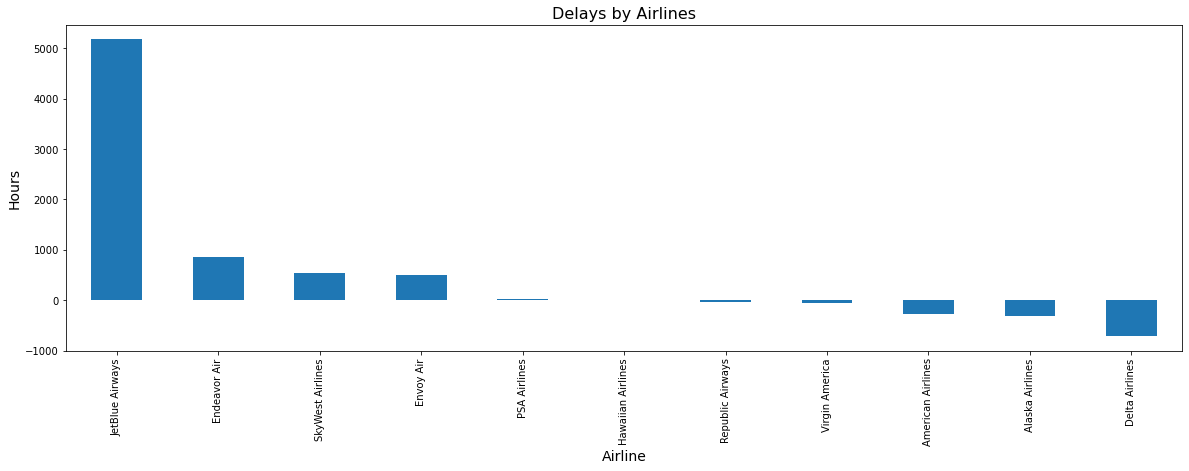

In [114]:
# Delays by airlines
plt.figure(figsize=(20, 6))
data.groupby('Airline').Arr_Delay.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by Airlines', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

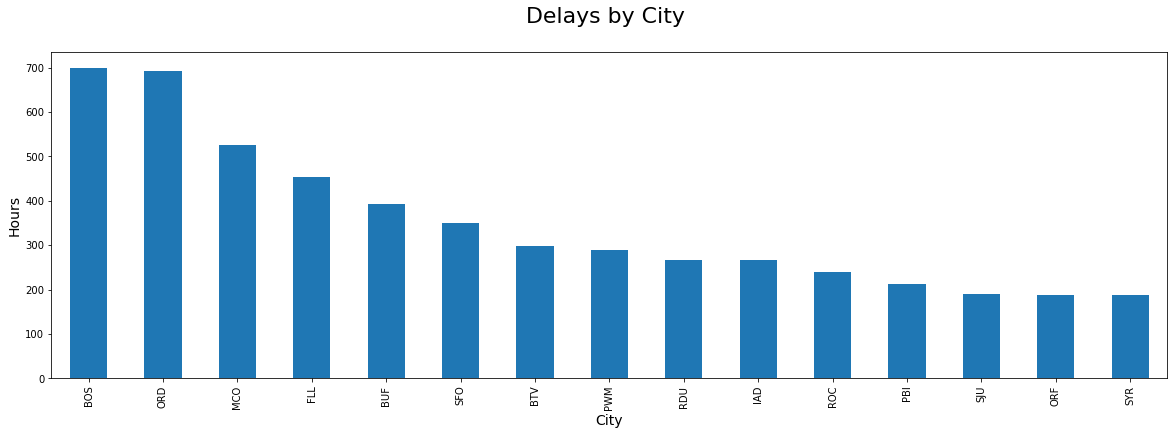

In [115]:
# Delays by City
# When the New Yorkers want to travel, be aware of potential delays for the flight to Boston or Orlando!


delay_by_dest = data.groupby('Destination').Arr_Delay.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
delay_by_dest[:15].plot.bar()
plt.title('Delays by City \n', fontsize = 22)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

### How long would customers experience taxi out time?

/Users/minjungsim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxi_Out', ylabel='Density'>

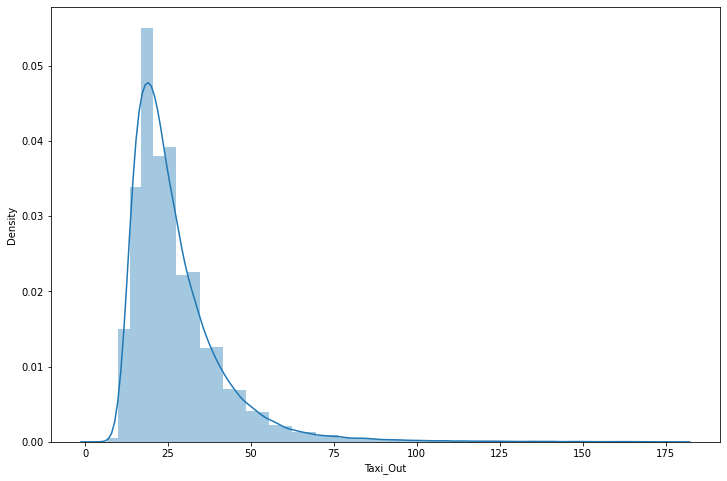

In [107]:
plt.figure(figsize=(12,8))

sns.distplot(data['Taxi_Out'])

### Mutivariate Analysis

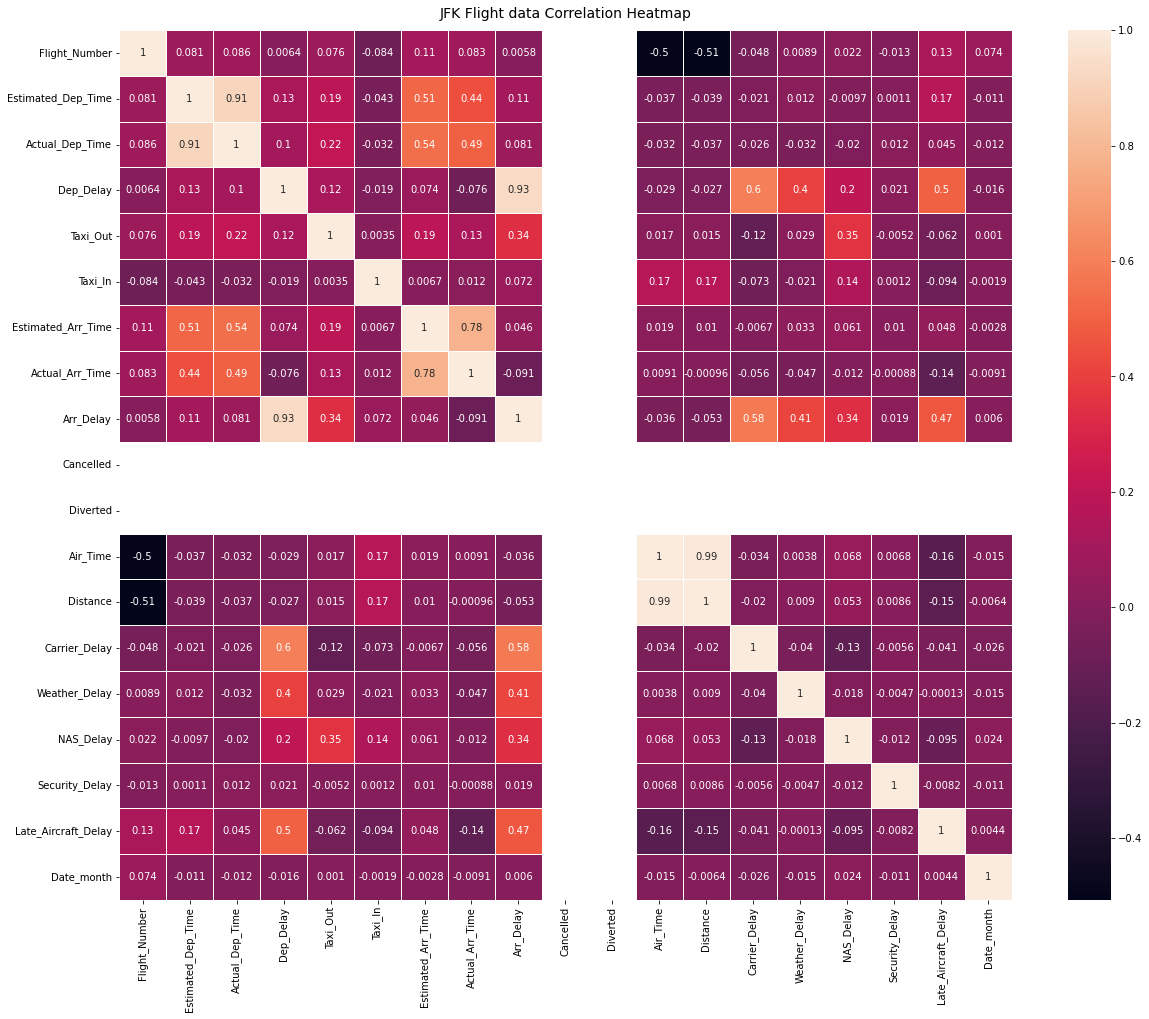

In [109]:
#Correation Heatmap
import seaborn as sns

plt.figure(figsize=(20,16))
df_corr = data.corr()
df_heatmap = sns.heatmap(df_corr, annot = True, linewidths = 1);
df_heatmap.set_title('JFK Flight data Correlation Heatmap', fontdict = {'fontsize' : 14}, pad = 12);

* Cancelled and Diverted are empty because their values are boolean. Yes goes to 1 and No goes to 0.

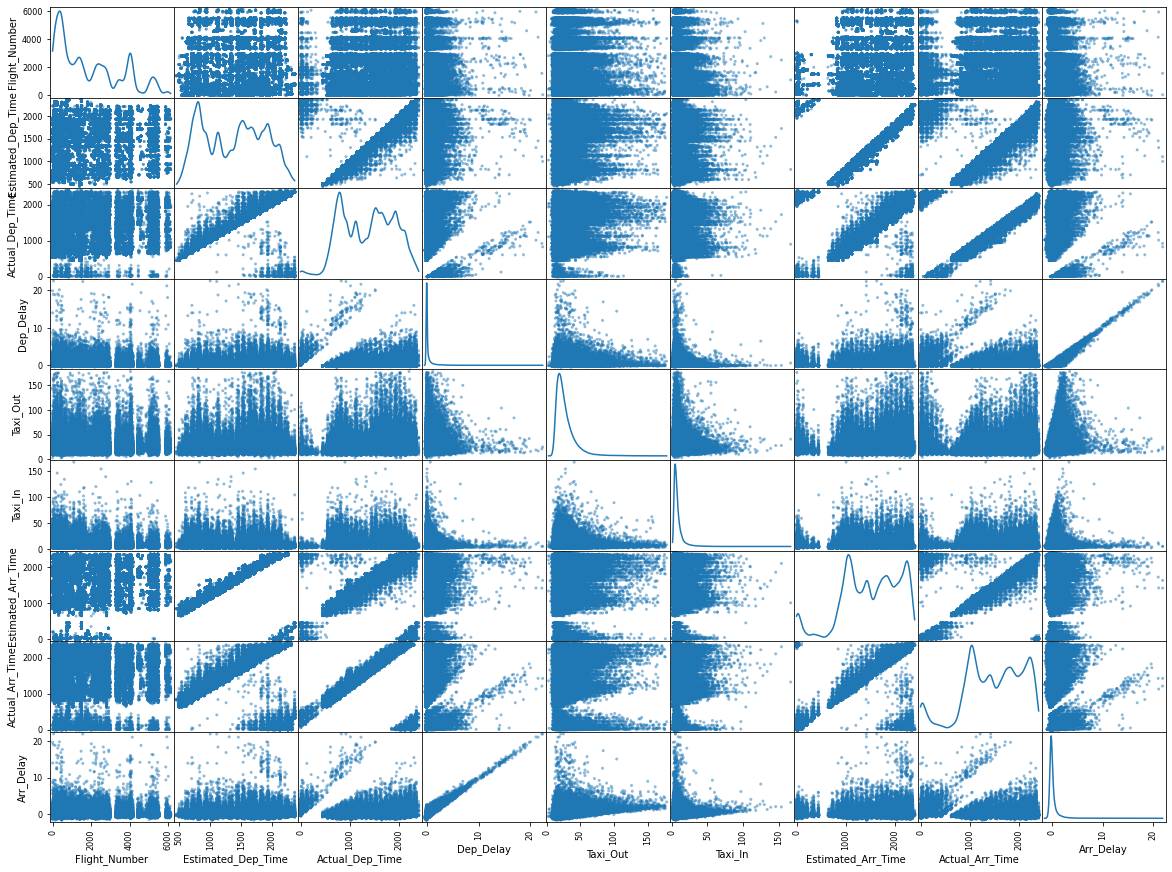

In [66]:
pd.plotting.scatter_matrix(data.loc[:, "Flight_Number":"Arr_Delay"], diagonal="kde",figsize=(20,15))
plt.show()

* A solid linear relationship is found between Dep_Delay and Arr_Delay in minute. 
* This is reasonable because when there is a 15 min delay in departure, it is more likely to have around 15 min delay in arrival.
* Otherwise, there are not many meaningful relationships each other because majority of variables like Flight Number,  Actual departure/arrival time or more. 

### Bivariate Analysis

<AxesSubplot:xlabel='Dep_Delay', ylabel='Arr_Delay'>

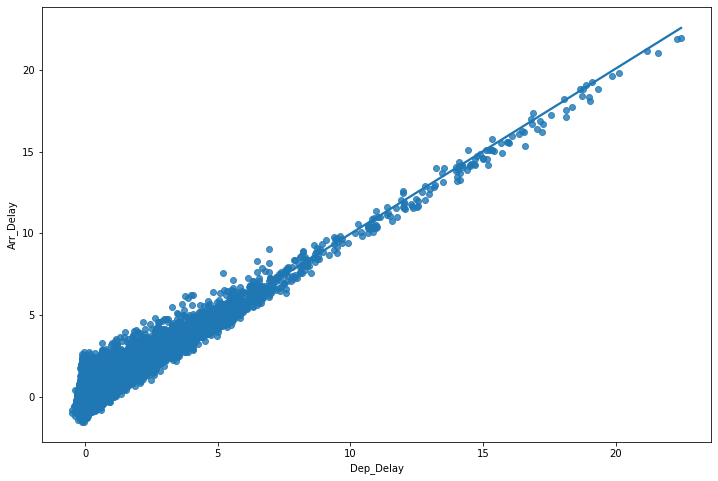

In [67]:
plt.figure(figsize=(12,8))

sns.regplot(x = 'Dep_Delay', y = 'Arr_Delay', data = data)

* The plot represent a solid positive linear regression between Departure delay and Arrival delay.
* This indicates that we could estimate arrival delay time and arrival time when we experience departure delay.